Loading Dataset

In [24]:
# imports
from scipy.stats import randint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# obtain titanic dataset and convert into dataframe
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(titanic_url)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Cleaning and Preparation

In [2]:
# identify missing values in df
null_count = titanic_df.isnull().sum()
null_count

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# using mean/mode imputation to fill na values in age and embarked
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode())
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# dropping irrelevant features
titanic_df_upd = titanic_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_df_upd

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
# one-hot encoding categorical variables
titanic_encoded = pd.get_dummies(titanic_df_upd, columns=['Embarked','Sex'])
titanic_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True,True,False
888,0,3,28.0,1,2,23.4500,False,False,True,True,False
889,1,1,26.0,0,0,30.0000,True,False,False,False,True


Exploratory Data Analysis (EDA)

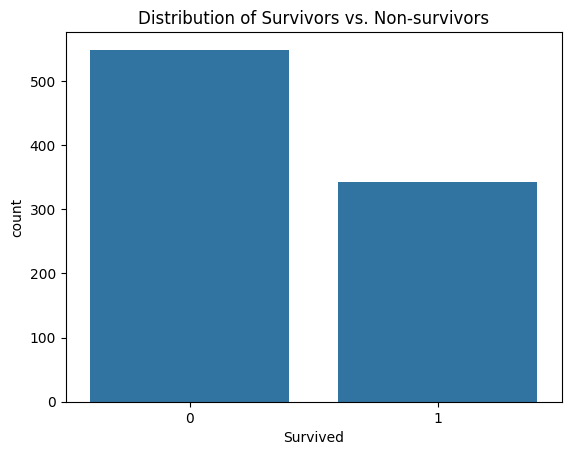

In [6]:
# visualization of the distribution of the target variable (survived)
# 0 - didn't survive, 1 - survived
sns.countplot(titanic_encoded, x='Survived')
plt.title("Distribution of Survivors vs. Non-survivors")
plt.show()

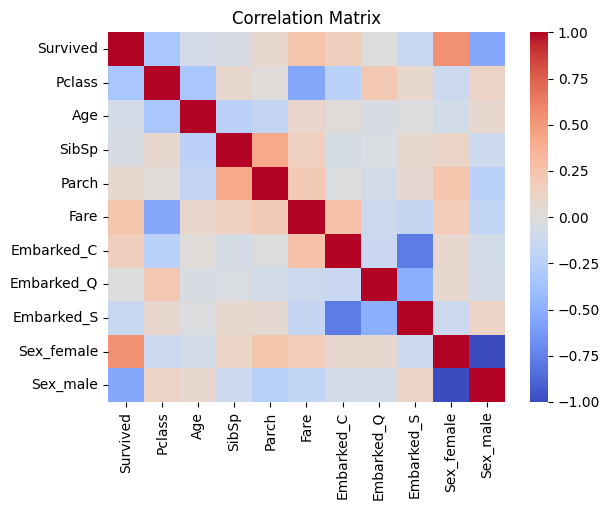

In [7]:
# visualization of the correlation matrix
titanic_corr = titanic_encoded.corr()

plt.title("Correlation Matrix")
sns.heatmap(titanic_corr, annot=False, cmap="coolwarm")
plt.show()

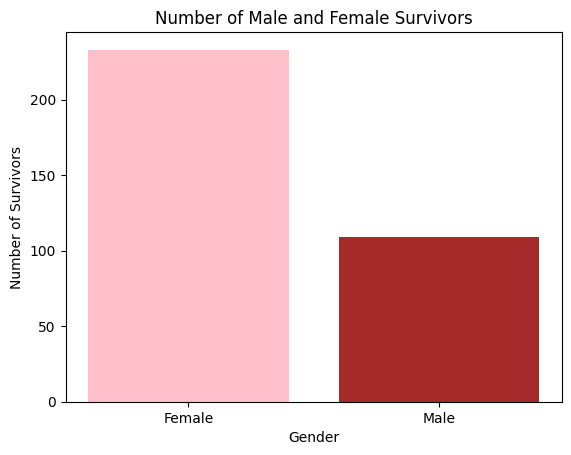

In [8]:
# of all the survivors, how many were female vs. male?
survived_female = titanic_encoded[titanic_encoded['Survived'] == 1]['Sex_female'].sum()
survived_male = titanic_encoded[titanic_encoded['Survived'] == 1]['Sex_male'].sum()

plt.bar(['Female', 'Male'], [survived_female, survived_male], color=['pink', 'brown'])
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.title('Number of Male and Female Survivors')
plt.show()

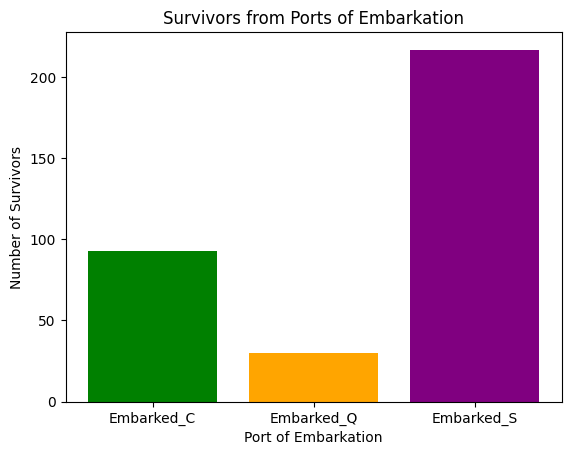

In [9]:
# which port of embarkation had the most amount of survivors?
survived_embarked_c = titanic_encoded[titanic_encoded['Survived'] == 1]['Embarked_C'].sum()
survived_embarked_q = titanic_encoded[titanic_encoded['Survived'] == 1]['Embarked_Q'].sum()
survived_embarked_s = titanic_encoded[titanic_encoded['Survived'] == 1]['Embarked_S'].sum()

plt.bar(['Embarked_C','Embarked_Q','Embarked_S'], [survived_embarked_c, survived_embarked_q, survived_embarked_s], color=['green','orange','purple'])
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of Survivors")
plt.title("Survivors from Ports of Embarkation")
plt.show()

Splitting the data

In [10]:
# splitting into 80/20 (training/testing)
titanic_train_full, titanic_test = train_test_split(titanic_encoded, test_size=0.2, random_state=42)

# take 20% out for validation, leaving 60% for training
titanic_train, titanic_val = train_test_split(titanic_train_full, test_size=0.25, random_state=42)

In [11]:
# target values for training and validation sets
y_train = titanic_train['Survived']
y_val = titanic_val['Survived']

In [12]:
# split data into features and target
X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
print("Training feature shape:", len(titanic_train))
print("Validation feature shape:", len(titanic_val))
print("Testing feature shape:", len(titanic_test))

Training feature shape: 534
Validation feature shape: 178
Testing feature shape: 179


Model training

In [14]:
# training baseline Random Forest classifier with default parameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# evaluate baseline model using ROC-AUC
y_pred_test = rf.predict(X_test)
roc_auc_score(y_val, y_pred_test[1:]) # throws away an element of index 0 in y_pred_test

0.41544913419913415

Hyperparameter tuning

In [15]:
# setting a range to test which value for each parameter is most optimal
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,32),
              'min_samples_leaf': randint(1,10)}

# random search to find the best hyperparameters
rf_test = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf_test,
                                 param_distributions = param_dist,
                                 n_iter = 5,
                                 cv=5)
rand_search.fit(X_train, y_train)

print("Best parameters:", rand_search.best_params_)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 4, 'n_estimators': 448}


Final model evaluation

In [23]:
# testing random search best parameters
rf_best = RandomForestClassifier(n_estimators=448, max_depth=14, min_samples_leaf=4)
rf_best.fit(X_train, y_train)

# evaluating "best" model using ROC-AUC
y_pred_best = rf_best.predict(X_test)
roc_auc_score(y_test, y_pred_best)

0.7720568517028693

Reporting

In [17]:
aucs = []

for i in range(10, 201, 10):
  rf_auc = RandomForestClassifier(n_estimators=i, random_state=3)
  rf_auc.fit(X_train, y_train)
  y_pred_auc = rf_auc.predict(X_test)
  auc = roc_auc_score(y_val, y_pred_auc[1:])
  print('%s -> %.3f' % (i, auc))
  aucs.append(auc)

10 -> 0.423
20 -> 0.407
30 -> 0.396
40 -> 0.411
50 -> 0.415
60 -> 0.408
70 -> 0.408
80 -> 0.408
90 -> 0.408
100 -> 0.408
110 -> 0.403
120 -> 0.403
130 -> 0.403
140 -> 0.403
150 -> 0.403
160 -> 0.403
170 -> 0.403
180 -> 0.403
190 -> 0.403
200 -> 0.411


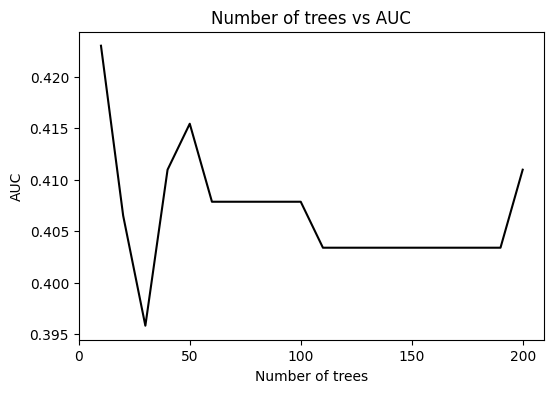

In [18]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

In [19]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred_auc = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_val, y_pred_auc[1:])
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.394
20 -> 0.391
30 -> 0.404
40 -> 0.409
50 -> 0.405
60 -> 0.406
70 -> 0.405
80 -> 0.405
90 -> 0.407
100 -> 0.411
110 -> 0.408
120 -> 0.407
130 -> 0.405
140 -> 0.405
150 -> 0.406
160 -> 0.406
170 -> 0.408
180 -> 0.408
190 -> 0.408
200 -> 0.412

depth: 10
10 -> 0.405
20 -> 0.407
30 -> 0.403
40 -> 0.415
50 -> 0.410
60 -> 0.421
70 -> 0.429
80 -> 0.431
90 -> 0.430
100 -> 0.429
110 -> 0.428
120 -> 0.430
130 -> 0.430
140 -> 0.430
150 -> 0.431
160 -> 0.431
170 -> 0.429
180 -> 0.430
190 -> 0.427
200 -> 0.427

depth: 20
10 -> 0.431
20 -> 0.431
30 -> 0.432
40 -> 0.433
50 -> 0.426
60 -> 0.423
70 -> 0.420
80 -> 0.425
90 -> 0.429
100 -> 0.430
110 -> 0.432
120 -> 0.431
130 -> 0.429
140 -> 0.429
150 -> 0.427
160 -> 0.428
170 -> 0.427
180 -> 0.427
190 -> 0.429
200 -> 0.429



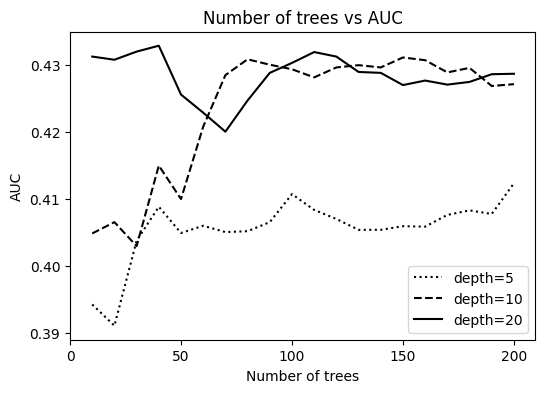

In [20]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')

plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

In [21]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_val, y_pred_auc[1:])
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.429
30 -> 0.429
50 -> 0.429
70 -> 0.429
90 -> 0.429
110 -> 0.429
130 -> 0.429
150 -> 0.429
170 -> 0.429
190 -> 0.429

min_samples_leaf: 5
10 -> 0.429
30 -> 0.429
50 -> 0.429
70 -> 0.429
90 -> 0.429
110 -> 0.429
130 -> 0.429
150 -> 0.429
170 -> 0.429
190 -> 0.429

min_samples_leaf: 10
10 -> 0.429
30 -> 0.429
50 -> 0.429
70 -> 0.429
90 -> 0.429
110 -> 0.429
130 -> 0.429
150 -> 0.429
170 -> 0.429
190 -> 0.429



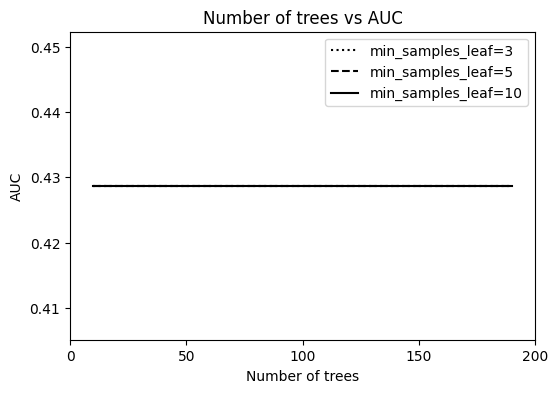

In [22]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')

plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

In [26]:
# more hyperparameter tuning, based on ROC AUC curves
rf_new_best = RandomForestClassifier(n_estimators=10, max_depth=20, min_samples_leaf=5)
rf_new_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10)

In [31]:
y_pred_rf_new_best = rf_new_best.predict(X_test)
roc_auc_score(y_val, y_pred_rf_new_best[1:])

0.4074675324675324

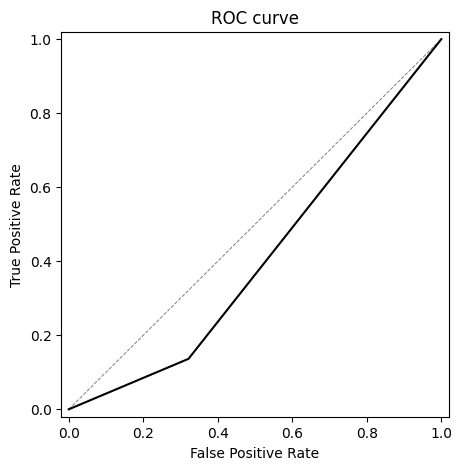

In [35]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf_new_best[1:])
plt.plot(fpr, tpr, color='black')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

Final Comments

In this project, I attempted to use two different methods of hyperparameter tuning in order to see which one yielded more favorable results.

Training a baseline random forest classifier with default parameters resulted in a roc auc score of about 41%. Using the hyperparameter tuning methods laid out in [this article](https://www.datacamp.com/tutorial/random-forests-classifier-python) resulted in a roc auc score of about 77%, a significant improvement from the baseline RF classifier.

I also used the hyperparameter tuning method explored in the RF lecture, and found that when I used the parameters that yielded the greatest results according to the roc auc curves, the roc auc score dropped slightly, going down to about 40%.

While the former method proved to be more successful, my main gripe with it is that the "best parameters" change with every run. So, for instance, the best n_estimators may be 200 one run and 350 the next. Granted, no matter what results it gave at the time, they always resulted in better roc auc scores than the baseline RF.

That being said, I would love to investigate this issue further and see if there is anything I can do to fine tune this method and make it give more definitive results. I also struggled with the use of validation sets. In the lecture example for credit score, validation sets are used to calculate the roc auc score. However, I used X_test to calculate everything, which might've influenced my final results.

Overall, I believe this project was a success, and that I was able to further optimize my RF classifier. These are just some improvements I would like to make in the future.

- Kayla Jones